In [71]:
# v1 readme:
# changed int division to float division in UserSim
# wrapped UserSim in list per HW instructions
# changed funnel calculation - now, uses survivor function (1 - cdf) instead of histogram of pdf
# converted Q2 plot to a grid of subplots, since HW asks for a single page of plots
# added survival time definition required for Q 1 c

In [72]:
# v1.1 readme: 
# added solution to question 2
# problems: not sure if estimated lambda is right since the curve on visual is not smooth
# I did not add comfidence interval on the visual because I am not sure if I did it entirely right

In [4]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

In [5]:
def UserSim(n, parameter):
    """
    input :
    n - the number to of users to simulate
    parameter - the rate parameter (lambda)
    
    output: 
    A list of exponential random variable simulations - specifically, the prbability density for each
    simulated random variable instance.
    """
    return list(np.random.exponential(1.0 / parameter, n)) #1st parameter is scale = 1/parameter given aka lambda

## Q. 1(a)



In [6]:
# Simulate 1,000 users with lambda = 2
n = 1000
parameter = 2
user_pdf = UserSim(n, parameter)  # simulate the probability densities of users

In [7]:
def get_survivors(user_pdf, max_time=3, time_step=0.25):
    """Given the probability distribution of an exponential R.V. and the max. time and time step return a tuple of
    cumulative survivor counts and corresponding times
    """
    num_bins = int(max_time / time_step)
    counts, bin_edges = np.histogram(user_pdf, bins=num_bins, range=(0, 3), density=False)  # bin the data
    cdf_user_counts = np.cumsum(counts)  # generate cumulative counts of users (similar to cdf)
    survivors = len(user_pdf) - cdf_user_counts      # users remaining at each time instance
    return (list(survivors), list(bin_edges[1:]))

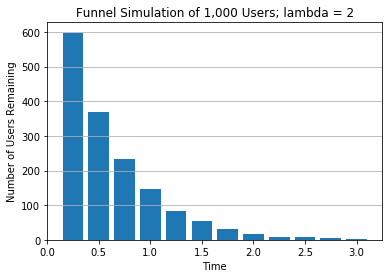

In [8]:
survivors, bin_edges = get_survivors(user_pdf)
fig, ax = plt.subplots(1,1)
plt.bar(bin_edges, survivors, width=0.2, align="center")
plt.xlabel('Time')
plt.ylabel('Number of Users Remaining')
plt.title('Funnel Simulation of 1,000 Users; lambda = 2')
plt.grid(axis='y')
fig.savefig('funnelq1.png', dpi=100)

## Q. 1(b)

In [9]:
# generate exp rv with the respect of each lambda value
params_all = np.arange(0.2, 3.2, 0.2)
user_pdfs_all = [get_survivors(UserSim(n, parameter)) for parameter in params_all]

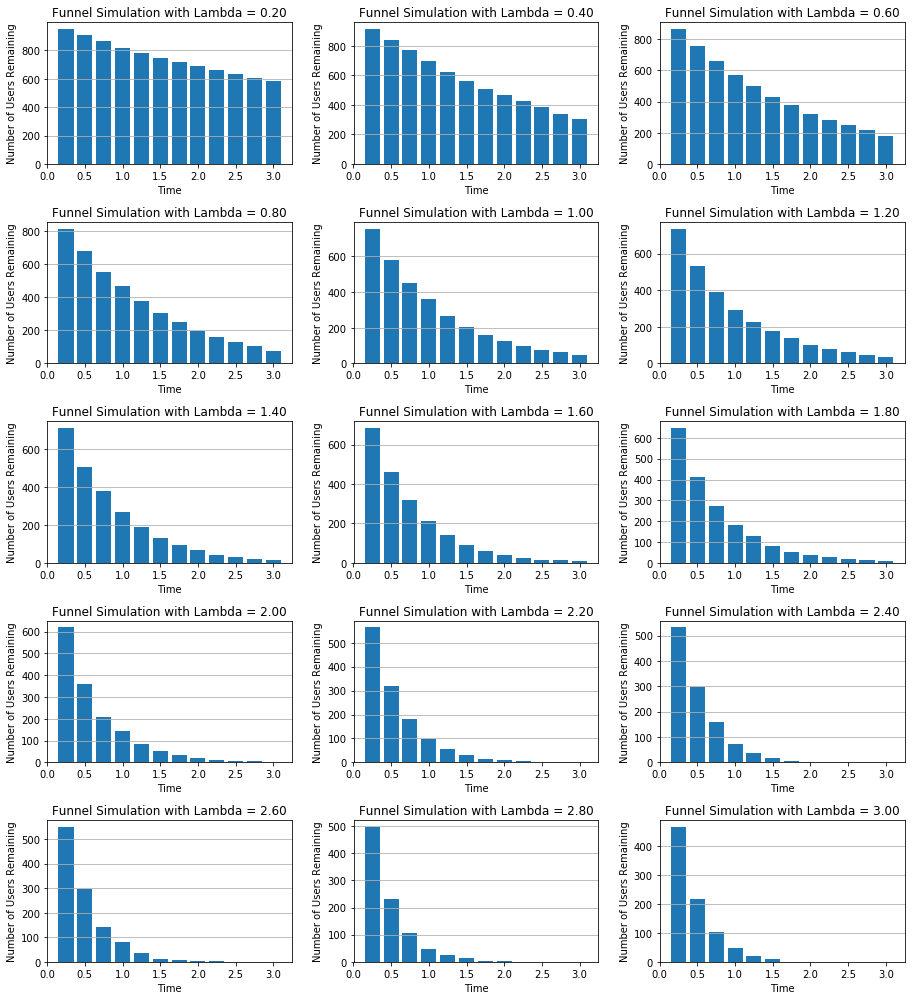

In [10]:
fig, axes = plt.subplots(5,3, sharex=False, sharey=False)
fig.set_size_inches(13, 14)
for i, ax in enumerate(axes.flatten()):
    ax.bar(user_pdfs_all[i][1], user_pdfs_all[i][0], width=0.2, align="center")
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Users Remaining')
    ax.grid(axis='y')
    ax.set_title('Funnel Simulation with Lambda = {:.2f}'.format(params_all[i]))
    
plt.tight_layout()
fig.savefig('funnelq2.png', dpi=100)

## Q. 1(c)

Survival time of a specified proportion of users is the total time spent by that proportion of users in the system (e.g. the sign-up pages of a website) before dropping out.  E.g. survival time for 50% of the users is the time it takes for 50% of the users to drop out of the system.  From the plots in (b), it appears that the survival time for any proportion of users drops down as lambda increases; i.e. lambda and survival time have an inverse relationship.

## Q. 2

In [11]:
#input: quitting_time - the user quitting time we get from UserSim
#output: estimated lambda (inverse of mean of quitting time)

def EstLam1(quitting_time): return 1.0/np.mean(np.array(quitting_time))

## Q. 2(a)

The output of EstLam1 is unbaised because exponential distribution is memory less, same as the simulated user quitting time. 

## Q. 2(b)

In [13]:
user_quitting_time = UserSim(1000, 1)

lambda_ = EstLam1(user_quitting_time)
print("Estimated lambda is {:.3f}".format(lambda_))

Estimated lambda is 1.017


## Q. 2(c)

In [17]:
def bootstrap(n, quitting_time, alpha):
    """
    input: 
    n - number of bootstaps 
    quitting_time - user quitting time acquired from UserSim
    alpha - significance level 
    
    output: 
    lower and upper bound of estimated lambda with respect to given alpha 
    """
    quitting_times = np.random.choice(quitting_time, size=(n,len(quitting_time))) # matrix contains 500 lists of simulated user quitting time
    estimated_lambda = np.apply_along_axis(EstLam1, 1, quitting_times) # estimated lamda for each user quiitng time list
    
    upper = np.percentile(estimated_lambda, (1.0 -alpha/2)*100) # upper bound of estimated lambda 
    lower = np.percentile(estimated_lambda, (alpha/2.0)*100) # lower bound of estimated lambda 
    
    return lower, upper

In [19]:
n = 500
lower, upper = bootstrap(n,quitting_time=user_quitting_time, alpha=0.5)
print('95% confidence interval for the estimated lambda is: [{:.3f},{:.3f}]'.format(lower,upper))

95% confidence interval for the estimated lambda is: [0.994,1.037]


## Q. 2(d)

In [20]:
num_users = [100, 200, 500, 1000, 2000, 5000, 10000]
estimated_lambdas = []
lower_bound = []
upper_bound = []

In [21]:
n = 500
for each in num_users:
    user_quitting_time = UserSim(each, 1) # simulate user quitting time
    estimated_lambdas.append(EstLam1(user_quitting_time)) # calculate estimated lambda 
    
    lower, upper = bootstrap(n,quitting_time=user_quitting_time, alpha=0.5) # lower and upper bound of estimated lambda 
    lower_bound.append(lower)
    upper_bound.append(upper)

In [22]:
table = pd.DataFrame({'number of users': num_users, 
                      'estimated lambda': estimated_lambdas,
                      'lower bound': lower_bound,
                      'upper bound': upper_bound})

In [23]:
table = table[['number of users','estimated lambda','lower bound','upper bound']]

In [24]:
table

,number of users,estimated lambda,lower bound,upper bound
0,100,1.097870,1.023743,1.171169
1,200,0.954548,0.906394,1.005959
2,500,0.990777,0.960286,1.021833
3,1000,0.978679,0.959015,0.998807
4,2000,1.005748,0.989667,1.020215
5,5000,0.998232,0.991502,1.008231
6,10000,1.015964,1.009052,1.024042


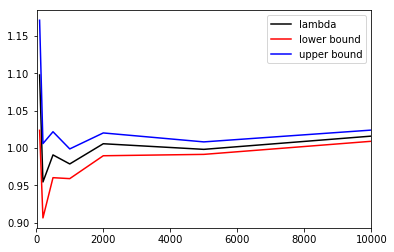

In [33]:
lambda_value = table['estimated lambda']
number_users = table['number of users']
lower_bound = table['lower bound']
upper_bound = table['upper bound']

plt.plot(number_users, lambda_value, 'black')
plt.plot(number_users,lower_bound , 'red')
plt.plot(number_users, upper_bound, 'blue')
plt.xlim(10, np.max(np.array(number_users)))
plt.legend(['lambda', 'lower bound', 'upper bound'])

As number of users increases the 95% confidence interval decreases. If we simulate more user data, we become more confident about the lambda we are estimating.